#  App Rating Predictions of Google Play-Store.

## Importing the necessary Libraries and uploading the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline                              

In [2]:
df_ps = pd.read_csv(r"C:\Users\Ajit\Desktop\Projects\App Rating Prediction\googleplaystore.csv")

In [3]:
df_ps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_ps.shape

(10841, 13)

In [5]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df_ps.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10822,PLMGSS FR,PRODUCTIVITY,NaN,0,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up
10823,List iptv FR,VIDEO_PLAYERS,NaN,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


## Performing Explorarory Data Analysis.

In [7]:
df_ps.isnull().sum()                                      # Checking For Null Values.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df_ps.dropna(how='any',inplace=True)

In [9]:
df_ps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
df_ps.shape

(9360, 13)

In [11]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [12]:
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
df_ps['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [14]:
## Cleaning Numerical data columns and assigning them correct data types

In [15]:
def mb_to_kb(Size):
    if 'M'in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x

    elif 'k'in Size:
        x=Size[:-1]
        x=float(x)
        return x
    
    else: return None                                  #Converting Size from Mb to Kb.

In [16]:
df_ps['Size']=df_ps['Size'].map(mb_to_kb)

In [17]:
df_ps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [18]:
df_ps.Size.isnull().sum()

1637

In [19]:
df_ps.Size.fillna(method='ffill',inplace=True)                           # Filling the null values with Forward fill method

In [20]:
df_ps.shape

(9360, 13)

In [21]:
df_ps['Size']=df_ps['Size'].astype('float')

In [22]:
 df_ps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [23]:
df_ps['Price'] = df_ps['Price'].apply(lambda x: x.replace(' ',''))               

In [24]:
df_ps['Price'] = df_ps['Price'].apply(lambda x: x.replace('$',''))
df_ps['Price']=df_ps['Price'].astype('float')
df_ps["Price"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

In [25]:
df_ps['Reviews']=df_ps['Reviews'].astype('float')

In [26]:
df_ps['Installs'] = df_ps['Installs'].apply(lambda x: x.replace(',','').replace('+',''))
df_ps['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: object

In [27]:
df_ps['Installs']=df_ps['Installs'].astype('int')

In [28]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 987.2+ KB


In [29]:
df_ps.shape

(9360, 13)

###  Sanity checks : Checking for Ratings greater than 5

In [30]:
df_ps.loc[df_ps.Rating < 1] & df_ps.loc[df_ps.Rating > 5]                     # Rating must be from 1 to 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Checking records where Review is more than Installs and droping those records.

In [31]:
df_ps.loc[df_ps['Reviews'] > df_ps['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [32]:
df_ps_rows2=df_ps[df_ps['Reviews']>df_ps['Installs']].index
df_ps_rows2

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [33]:
df_ps.drop(df_ps_rows2,inplace=True)

In [34]:
df_ps.loc[df_ps['Reviews'] > df_ps['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [35]:
df_ps.shape

(9353, 13)

In [36]:
df_ps_free=(df_ps.Type=='Free')&(df_ps.Price>0)

In [37]:
df_ps_free.value_counts()

False    9353
dtype: int64

### Performing univariate analysis on Price,Review,Rating and Size columns.

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe17c664f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe17c66bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe17c66190>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe17c712b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe17c715b0>],
 'means': []}

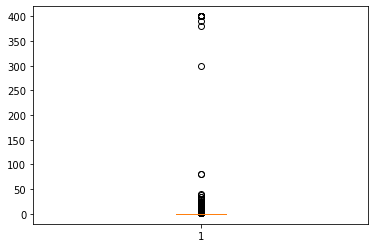

In [38]:
plt.boxplot(df_ps['Price'])

In [39]:
#outlier present for Price.

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe17d0b580>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe17d0bc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe17d0b220>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe17d12340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe17d12640>],
 'means': []}

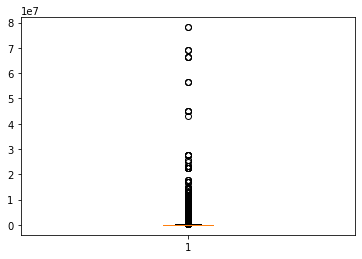

In [40]:
plt.boxplot(df_ps['Reviews'])

In [41]:
# There are some apps with high reviews.

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

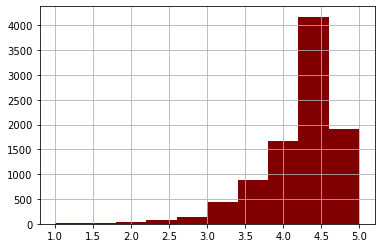

In [42]:
plt.grid()
plt.hist(df_ps['Rating'],color='maroon')

### <font color=maroon> Distribution is towards higher ratings.</font>

(array([3823., 1738., 1265.,  742.,  536.,  406.,  279.,  190.,  144.,
         230.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <a list of 10 Patch objects>)

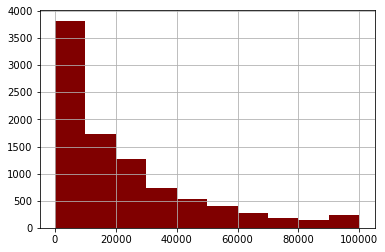

In [43]:
plt.grid()
plt.hist(df_ps['Size'],color='maroon')

### <font color=maroon> Price and Reviews have outliers.</font>

In [44]:
#6. Outlier treatment

In [45]:
df_ps_rows3= df_ps[df_ps['Price']>200].index

In [46]:
df_ps_rows3

Int64Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362,
            5364, 5366, 5369, 5373],
           dtype='int64')

In [47]:
df_ps.drop(df_ps_rows3,inplace=True)                                    # Dropping the records where price is greater than 200

In [48]:
df_ps.shape

(9338, 13)

In [49]:
df_ps_rows4=df_ps[df_ps['Reviews']>2000000].index

In [50]:
df_ps_rows4

Int64Index([  139,   335,   336,   338,   340,   341,   342,   344,   345,
              347,
            ...
             8658,  8894,  8896,  9140,  9142,  9166,  9841, 10186, 10190,
            10327],
           dtype='int64', length=453)

In [51]:
df_ps.drop(df_ps_rows4,inplace=True)                                 #Dropping the records where reviews greater than 2million

In [52]:
percentile=[.10,.25,.50,.70,.90,.95,.99]

In [53]:
df_ps['Installs'].describe(percentiles=percentile)

count    8.885000e+03
mean     6.267379e+06
std      3.539960e+07
min      5.000000e+00
10%      1.000000e+03
25%      1.000000e+04
50%      5.000000e+05
70%      1.000000e+06
90%      1.000000e+07
95%      1.000000e+07
99%      1.000000e+08
max      1.000000e+09
Name: Installs, dtype: float64

In [54]:
df_ps['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8885, dtype: int32

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe17e84700>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe17e84dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe17e843a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe17e914c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe17e917c0>],
 'means': []}

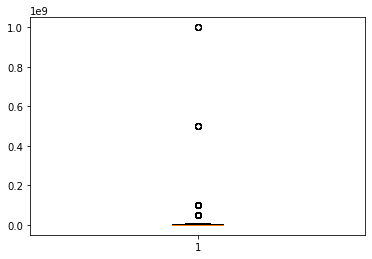

In [55]:
plt.boxplot(df_ps['Installs'])

### 10000000 installs as threshold 

In [56]:
df_ps_rows5=df_ps[df_ps['Installs']>10000000].index

In [57]:
df_ps_rows5

Int64Index([    3,   143,   152,   188,   192,   194,   201,   225,   292,
              293,
            ...
            10196, 10200, 10253, 10378, 10408, 10429, 10513, 10549, 10647,
            10707],
           dtype='int64', length=389)

In [58]:
df_ps.drop(df_ps_rows5,inplace=True)

In [59]:
df_ps.shape

(8496, 13)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE17F12640>,
      dtype=object)

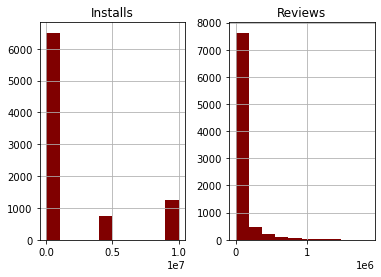

In [60]:
df_ps.hist(column=['Installs','Reviews'],color='maroon')

### Bivariate analysis

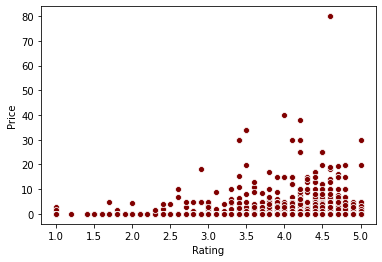

In [61]:
sns.scatterplot(x=df_ps['Rating'],y=df_ps['Price'],color='maroon')

### <font color=maroon> The scatter Plots shows that the ratings increases with price.</font>

Text(0, 0.5, 'Size in KB')

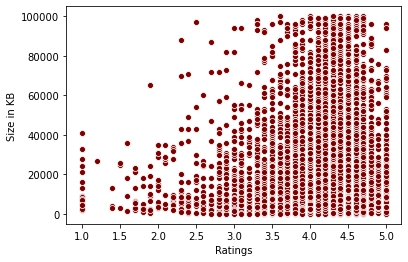

In [62]:
sns.scatterplot(x=df_ps['Rating'],y=df_ps['Size'],color='maroon')
plt.xlabel('Ratings')
plt.ylabel('Size in KB')

### <font color=maroon> Plot of Ratings VS Size shows that Rating is increasing with size of apps.</font>

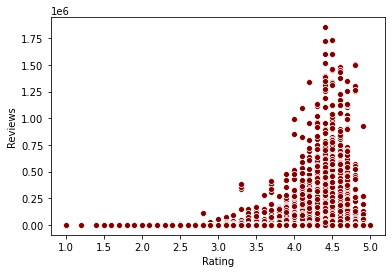

In [63]:
sns.scatterplot(x=df_ps['Rating'],y=df_ps['Reviews'],color='maroon')

### <font color=maroon> The above plot shows that Ratings increases with Reviews.</font>

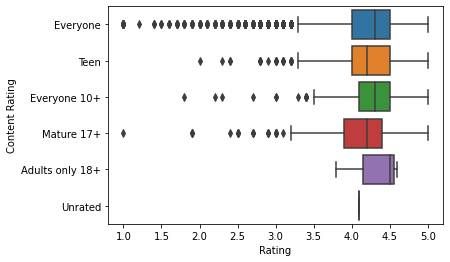

In [64]:
sns.boxplot(x=df_ps['Rating'],y=df_ps['Content Rating'])

### <font color=maroon> Here Everyone, Teen, Mature+17 are rated better than others.</font>

Text(0, 0.5, 'Category')

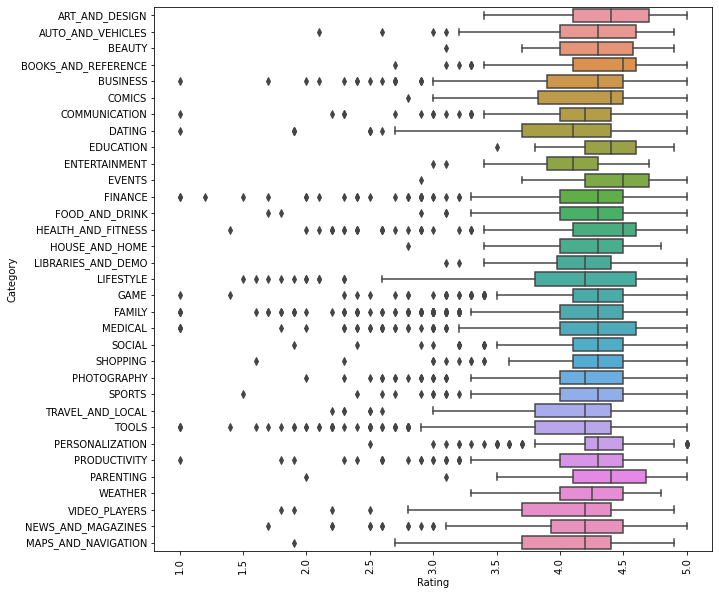

In [65]:
plt.rcParams["figure.figsize"]=(10,10)
x=sns.boxplot(y=df_ps['Category'],x=df_ps['Rating'])
plt.xticks(rotation='vertical')
plt.yticks()
plt.xlabel('Rating')
plt.ylabel('Category')

In [66]:
### Here Books & Reference, Events, Health & finess has the highest rating.

In [67]:
category_count=df_ps["Category"].value_counts()

In [68]:
category=[]
values=list(category_count.values)

for i in category_count.index:
    category.append(i)

Text(0, 0.5, 'All Categories')

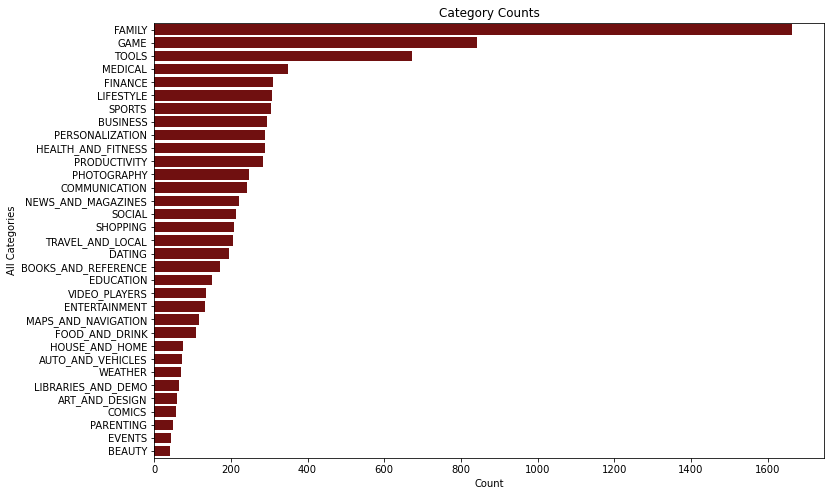

In [69]:
plt.rcParams["figure.figsize"]=(12,8)
plot=sns.barplot(y=category,x=values,data=df_ps,color="maroon")
plot.set(title="Category Counts")
plot.set_xlabel("Count")
plot.set_ylabel("All Categories")

## Data preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE17E47040>,
      dtype=object)

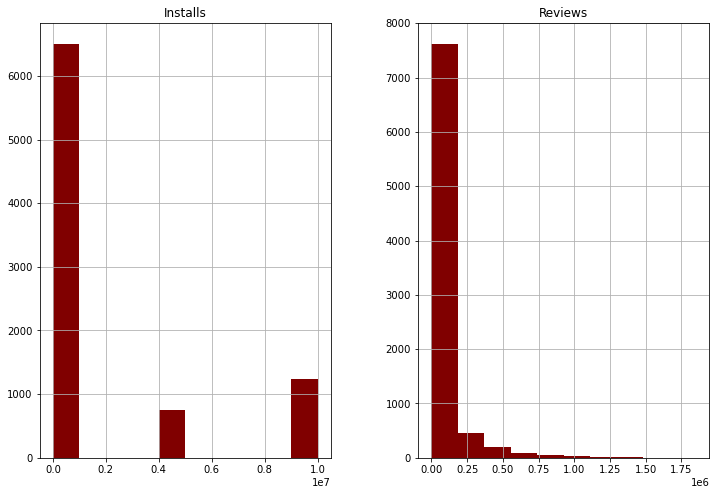

In [70]:
df_ps.hist(column=['Installs','Reviews'],color='maroon')

In [71]:
df_ps.to_csv(r"C:\Users\Ajit\Desktop\Projects\App Rating Prediction\playstore_clean.csv")

In [72]:
inp1=df_ps.copy(deep=True)

In [73]:
inp1.Installs=inp1.Installs.apply(func=np.log1p)
inp1.Reviews=inp1.Reviews.apply(func=np.log1p)                      #Applying log transformation to reviews and installs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE17FF68E0>,
      dtype=object)

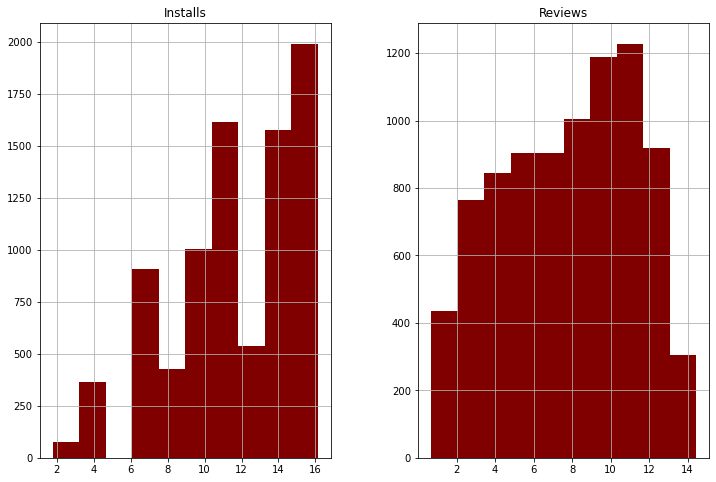

In [74]:
inp1.hist(column=['Installs','Reviews'],color='maroon')

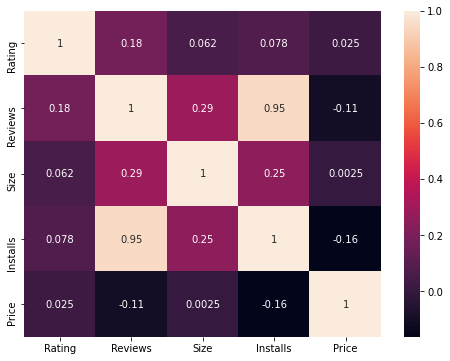

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(inp1.corr(),annot=True)
plt.show()

In [76]:
## Droping the unnecessary columns.

In [77]:
inp1.drop(["App","Last Updated","Current Ver","Android Ver"],inplace=True,axis=1)

In [78]:
inp1.shape

(8496, 9)

In [79]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [80]:
inp1_num=inp1.select_dtypes(include=['float64'])

In [81]:
inp1_num

,Rating,Reviews,Size,Installs,Price
0,4.1,5.075174,19000.0,9.210440,0.0
1,3.9,6.875232,14000.0,13.122365,0.0
2,4.7,11.379520,8700.0,15.424949,0.0
4,4.3,6.875232,2800.0,11.512935,0.0
5,4.4,5.123964,5600.0,10.819798,0.0
...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0
10836,4.5,3.663562,53000.0,8.517393,0.0
10837,5.0,1.609438,3600.0,4.615121,0.0
10839,4.5,4.744932,3600.0,6.908755,0.0


In [82]:
# content=pd.get_dummies(inp1[['Content Rating','Type']])
# content_num=pd.concat([inp1_num,content],axis=1)
# content_num.corr()
# plt.figure(figsize=(12,8))
# sns.heatmap(content_num.corr(),annot=True)
# plt.show()
# content_num.columns

In [83]:
#content_num.head()

In [84]:
#content_num.drop(content_num[["Content Rating_Unrated","Content Rating_Everyone",'Content Rating_Adults only 18+']],inplace=True,axis=1)

In [85]:
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,2.079442,2600.0,6.216606,Free,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,4.744932,3600.0,6.908755,Free,0.0,Mature 17+,Books & Reference


## Handling Categorical columns.

In [86]:
inp2=pd.get_dummies(inp1[['Category','Genres']],drop_first=True)
inp2.head()

,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
inp2_combine = pd.concat([inp1_num,inp2],axis=1)

In [88]:
inp2_combine.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
inp2_combine.shape

(8496, 151)

In [90]:
inp2_combine["Rating"]

0        4.1
1        3.9
2        4.7
4        4.3
5        4.4
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 8496, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X=inp2_combine.iloc[:,1:]
y=inp2_combine.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.70, random_state=1)

In [93]:
X_train.shape,X_test.shape

((5947, 150), (2549, 150))

In [94]:
y_train.shape,y_test.shape

((5947, 1), (2549, 1))

## Preforming Regression Analysis.

In [95]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train, y_train)                                                       

LinearRegression()

In [96]:
lm.intercept_

array([4.17968198])

In [97]:
y_pred=lm.predict(X_test)
y_pred

array([[4.28257481],
       [3.75346183],
       [3.92177764],
       ...,
       [4.52651443],
       [4.27966782],
       [4.17915593]])

In [98]:
y_test=np.array(y_test)
y_test

array([[3.7],
       [3. ],
       [3.8],
       ...,
       [1. ],
       [4.3],
       [4.2]])

In [99]:
from sklearn.metrics import  r2_score

In [100]:
r2_score(y_test,y_pred)

0.12753872095723595

### <font color="maroon">R2 score for test data is 0.1275</font>

In [101]:
y_pred_train=lm.predict(X_train)

In [102]:
r2_score(y_train,y_pred_train)

0.16719261776807837

### <font color=maroon>R2 score for train data is 0.167 </font>

In [103]:
import statsmodels.api as sm
x_train=sm.add_constant(X_train)
lm_1=sm.OLS(y_train,x_train).fit()
print(lm_1.summary())

C:\Users\Ajit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Ajit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     10.18
Date:                Tue, 01 Mar 2022   Prob (F-statistic):          5.91e-156
Time:                        14:55:50   Log-Likelihood:                -4077.5
No. Observations:                5947   AIC:                             8387.
Df Residuals:                    5831   BIC:                             9163.
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

C:\Users\Ajit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Ajit\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [104]:
Rating=pd.DataFrame({'Actual':np.array(y_test.flatten()),'Predicted':np.array(y_pred.flatten())})
Rating.tail(10)

,Actual,Predicted
2539,5.0,4.296951
2540,4.8,4.161649
2541,4.0,4.064599
2542,4.3,3.813148
2543,4.2,4.146988
2544,4.1,4.327905
2545,4.2,4.146080
2546,1.0,4.526514
2547,4.3,4.279668
2548,4.2,4.179156


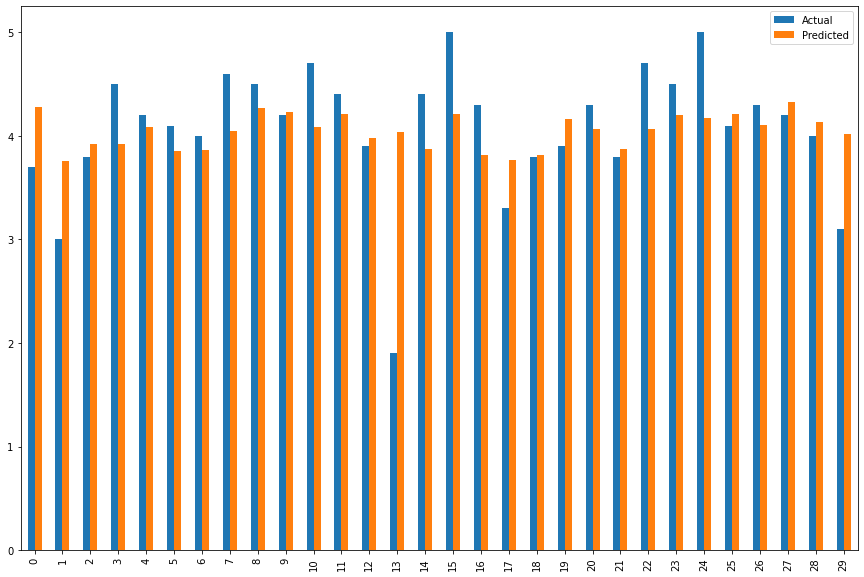

In [105]:
Rating[0:30].plot.bar(figsize=(15,10))